In [4]:
# import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplot.colors import listedcolormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first 5 rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Check missing values
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [42]:
X = df.drop('target', axis=1)
y = df['target']


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print ("model is train succesful")

model is train succesful


In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9824561403508771


In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 62   1]
 [  2 106]]


In [16]:
# Create a 2D array with proper syntax using lists
array = [
    [True, "Malignant", False, "Benign"],
    [False, "Malignant", True, "Benign"]
]

# Alternatively, if you need a NumPy array:
# import numpy as np
# array = np.array([
#     [True, "Malignant", False, "Benign"],
#     [False, "Malignant", True, "Benign"]
# ], dtype=object)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



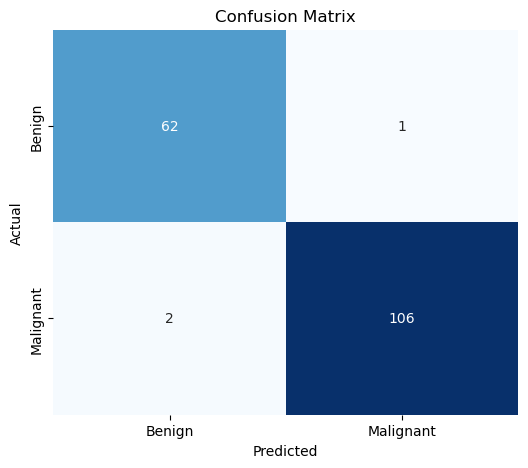

In [21]:


print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Benign','Malignant'],
           yticklabels=['Benign','Malignant'])
plt.title('Confusion Matrix')  # Fixed typo in 'confusion'
plt.xlabel('Predicted')  # Fixed method name from plt.xlabels to plt.xlabel
plt.ylabel('Actual')  # Fixed method name from plt.ylabels to plt.ylabel
plt.show()

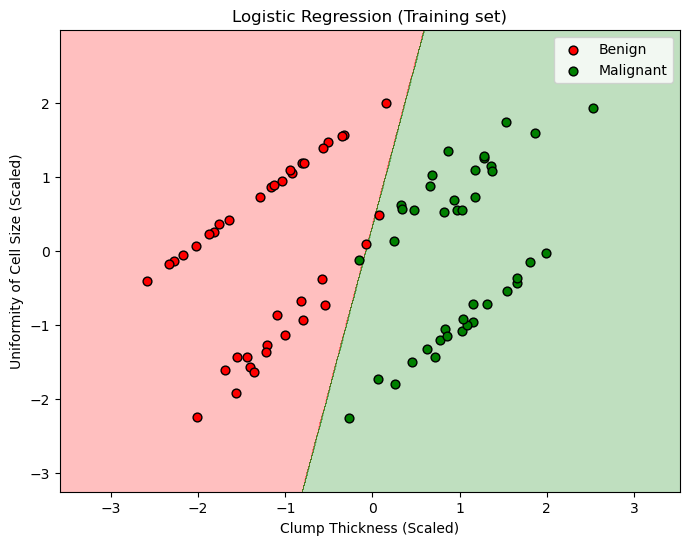

In [41]:


# Visualising the Test set results
def visualize_boundary(X_set, y_set, title):
    X_vis = X_set[:, [0, 1]] 
    clf_vis = LogisticRegression(random_state=42)
    clf_vis.fit(X_vis, y_set)
    X1, X2 = np.meshgrid(np.arange(start=X_vis[:, 0].min() - 1, stop=X_vis[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_vis[:, 1].min() - 1, stop=X_vis[:, 1].max() + 1, step=0.01))
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, clf_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.25, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_vis[y_set == j, 0], X_vis[y_set == j, 1],
                    color=ListedColormap(('red', 'green'))(i), 
                    label=('Benign' if j==0 else 'Malignant'),
                    edgecolors='black', s=40)
    plt.title(title)
    plt.xlabel('Clump Thickness (Scaled)')
    plt.ylabel('Uniformity of Cell Size (Scaled)')
    plt.legend()
    plt.show()

visualize_boundary(X_train, y_train, 'Logistic Regression (Training set)')


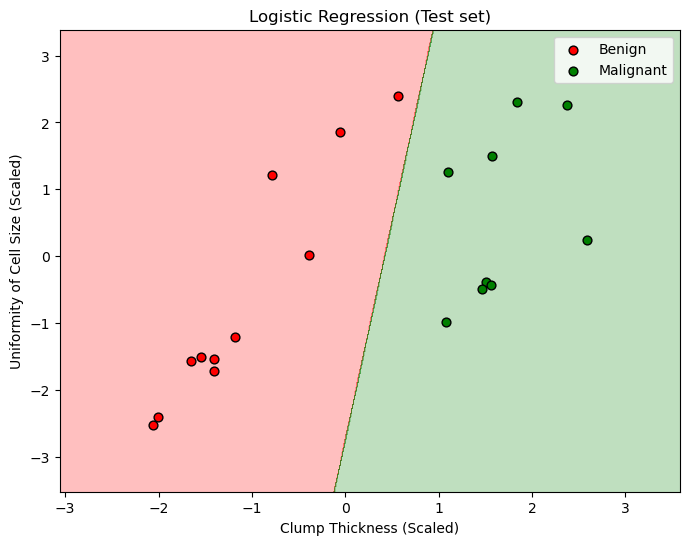

In [40]:
#  Visualising the Test set results
visualize_boundary(X_test, y_test, 'Logistic Regression (Test set)')